In [2]:
import pandas as pd
import pylidc as pl
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt



# test

Codigo para lembrar apenas

In [27]:
'''
import sys
!{sys.executable} -m pip install pyradiomics
'''

  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'

  ERROR: Command errored out with exit status 1:
   command: 'c:\Users\admin\AppData\Local\Programs\Python\Python36\python.exe' 'c:\Users\admin\AppData\Local\Programs\Python\Python36\lib\site-packages\pip' install --ignore-installed --no-user --prefix 'C:\Users\admin\AppData\Local\Temp\pip-build-env-t7wnuaf4\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- 'setuptools>=61.0' numpy versioneer
       cwd: None
  Complete output (2 lines):
  ERROR: Could not find a version that satisfies the requirement setuptools>=61.0 (from versions: 0.6b1, 0.6b2, 0.6b3, 0.6b4, 0.6rc1, 0.6rc2, 0.6rc3, 0.6rc4, 0.6rc5, 0.6rc6, 0.6rc7, 0.6rc8, 0.6rc9, 0.6rc10, 0.6rc11, 0.7.2, 0.7.3, 0.7.4, 0.7.5, 0.7.6, 0.7.7, 0.7.8, 0.8, 0.9, 0.9.1, 0.9.2, 0.9.3, 0.9.4, 0.9.5, 0.9.6, 0.9.7, 0.9.8, 1.0, 1.1, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5, 1.1.6, 1.1.7, 1.2, 1.3, 1.3.1, 1.3.2, 1.4, 1.4.1, 1.4.2, 2.0, 2.0.1, 2.0.2, 2.1, 2.1.1, 2.1.2, 2.2, 3.0, 3.0.1, 3.0.2, 3.1, 3.2


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using legacy 'setup.py install' for docopt, since package 'wheel' is not installed.
Failed to build ruamel.yaml.clib


  copying .\__init__.py -> build\lib.win-amd64-3.6\ruamel\yaml\clib
  copying .\LICENSE -> build\lib.win-amd64-3.6\ruamel\yaml\clib
  running build_ext
  building '_ruamel_yaml' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  ----------------------------------------
  ERROR: Failed building wheel for ruamel.yaml.clib
ERROR: Could not build wheels for ruamel.yaml.clib, which is required to install pyproject.toml-based projects


# Leitura dos ficheiros

In [3]:
nodule_counts = pd.read_excel('lidc-idri-nodule-counts-6-23-2015.xlsx', engine='openpyxl')
patient_diagnoses = pd.read_excel('tcia-diagnosis-data-2012-04-20.xls')
dicom_metadata = pd.read_csv('LIDC-IDRI_MetaData.csv')


# Inicializar pylidc para trabalhar com as anotações XML
cases = pl.query(pl.Scan).all()



print(nodule_counts.head())
print(100*"*")
print(patient_diagnoses.head())
print(100*"*")
print(dicom_metadata.head())
print(100*"*")
print(len(cases))

   TCIA Patent ID  Total Number of Nodules*   Number of Nodules >=3mm**  \
0  LIDC-IDRI-0001                          4                          1   
1  LIDC-IDRI-0002                         12                          1   
2  LIDC-IDRI-0003                          4                          4   
3  LIDC-IDRI-0004                          4                          1   
4  LIDC-IDRI-0005                          9                          3   

   Number of Nodules <3mm***  Unnamed: 4  \
0                          3         NaN   
1                         11         NaN   
2                          0         NaN   
3                          3         NaN   
4                          6         NaN   

                                          Unnamed: 5  
0                                                NaN  
1  *total number of lesions that received either ...  
2  **total number of lesions that received a "nod...  
3  ***total number of lesions that received a "no...  
4        

Renomear colunas

In [4]:
# Renomear as colunas para 'PatientID' se necessário
nodule_counts.rename(columns={'TCIA Patent ID': 'PatientID'}, inplace=True)
patient_diagnoses.rename(columns={'TCIA Patient ID': 'PatientID'}, inplace=True)
dicom_metadata.rename(columns={'Subject ID': 'PatientID'}, inplace=True)



# Merge dos datasets Nodule_counts , dicom_metadata , anotações (XML)

In [5]:
patient_info = pd.merge( dicom_metadata,nodule_counts, on='PatientID', how='inner')
print(patient_info)



# Unificar com os metadados DICOM
complete_data = pd.merge(patient_info, patient_diagnoses, on='PatientID', how='inner')

print(complete_data.head())

           PatientID                                          Study UID  \
0     LIDC-IDRI-1001  1.3.6.1.4.1.14519.5.2.1.6279.6001.281499745765...   
1     LIDC-IDRI-0778  1.3.6.1.4.1.14519.5.2.1.6279.6001.174809695196...   
2     LIDC-IDRI-0813  1.3.6.1.4.1.14519.5.2.1.6279.6001.139110171863...   
3     LIDC-IDRI-0710  1.3.6.1.4.1.14519.5.2.1.6279.6001.116146223752...   
4     LIDC-IDRI-0410  1.3.6.1.4.1.14519.5.2.1.6279.6001.818775038273...   
...              ...                                                ...   
1321  LIDC-IDRI-0480  1.3.6.1.4.1.14519.5.2.1.6279.6001.167583044843...   
1322  LIDC-IDRI-0669  1.3.6.1.4.1.14519.5.2.1.6279.6001.886430358468...   
1323  LIDC-IDRI-0974  1.3.6.1.4.1.14519.5.2.1.6279.6001.214565862082...   
1324  LIDC-IDRI-0473  1.3.6.1.4.1.14519.5.2.1.6279.6001.210105060472...   
1325  LIDC-IDRI-0493  1.3.6.1.4.1.14519.5.2.1.6279.6001.333362756208...   

     Study Description             Study Date  \
0                  NaN  2000-01-01 00:00:00.0   
1

LIDC-IDRI-0010
Inspecting Nódulo 144: Annotation(id=144,scan_id=21)
Contour(id=696,annotation_id=144)
Contour(id=697,annotation_id=144)
Contour(id=698,annotation_id=144)
Contour(id=699,annotation_id=144)


c:\Users\admin\AppData\Local\Programs\Python\Python36\lib\_collections_abc.py:666: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]
c:\Users\admin\AppData\Local\Programs\Python\Python36\lib\site-packages\pylidc\Annotation.py:764: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  facecolors=plt.cm.cmap_d[cmap](t))


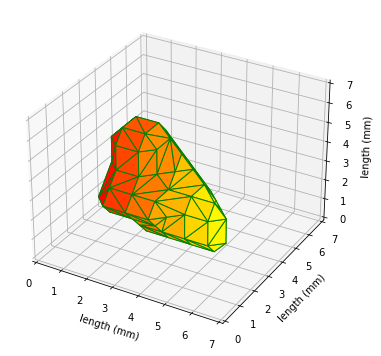

LIDC-IDRI-0010
Inspecting Nódulo 141: Annotation(id=141,scan_id=21)
Contour(id=681,annotation_id=141)
Contour(id=682,annotation_id=141)
Contour(id=683,annotation_id=141)
Contour(id=684,annotation_id=141)


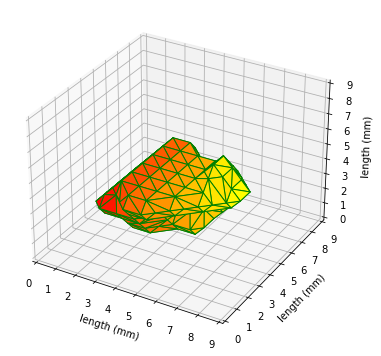

Inspecting Nódulo 143: Annotation(id=143,scan_id=21)
Contour(id=691,annotation_id=143)
Contour(id=692,annotation_id=143)
Contour(id=693,annotation_id=143)
Contour(id=694,annotation_id=143)
Contour(id=695,annotation_id=143)


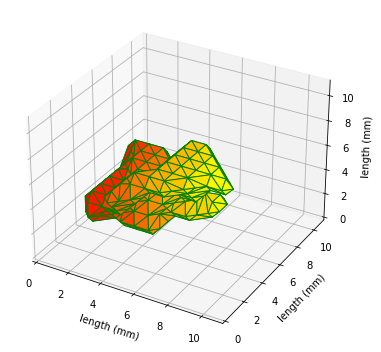

LIDC-IDRI-0010
Inspecting Nódulo 138: Annotation(id=138,scan_id=21)
Contour(id=669,annotation_id=138)
Contour(id=670,annotation_id=138)
Contour(id=671,annotation_id=138)
Contour(id=672,annotation_id=138)


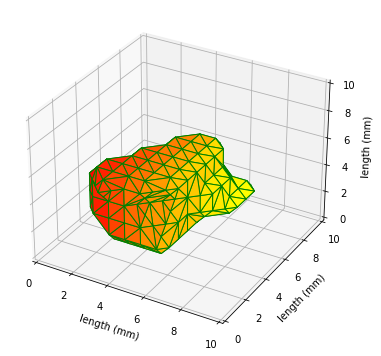

Inspecting Nódulo 139: Annotation(id=139,scan_id=21)
Contour(id=673,annotation_id=139)
Contour(id=674,annotation_id=139)
Contour(id=675,annotation_id=139)
Contour(id=676,annotation_id=139)


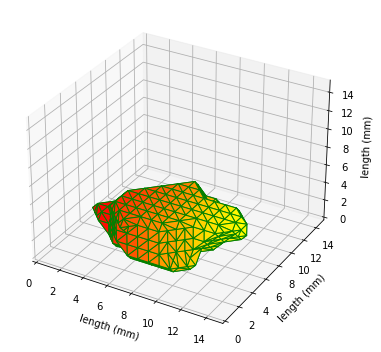

Inspecting Nódulo 140: Annotation(id=140,scan_id=21)
Contour(id=677,annotation_id=140)
Contour(id=678,annotation_id=140)
Contour(id=679,annotation_id=140)
Contour(id=680,annotation_id=140)


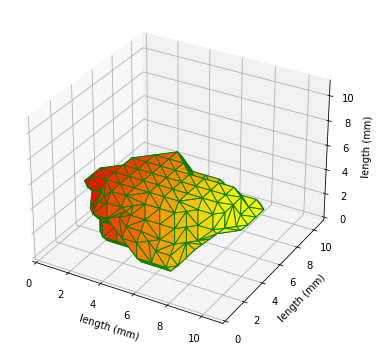

Inspecting Nódulo 142: Annotation(id=142,scan_id=21)
Contour(id=685,annotation_id=142)
Contour(id=686,annotation_id=142)
Contour(id=687,annotation_id=142)
Contour(id=688,annotation_id=142)
Contour(id=689,annotation_id=142)
Contour(id=690,annotation_id=142)


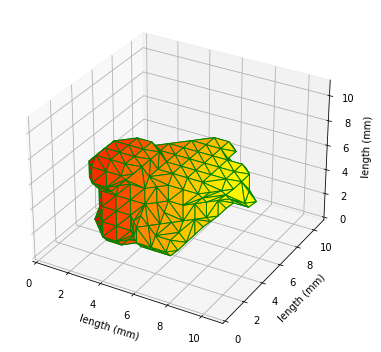

In [15]:
# Criar uma lista para armazenar informações detalhadas dos contornos dos nódulos
nodule_data = []

# Obter todos os casos de Scan
cases = pl.query(pl.Scan).all()

# Acessar o décimo paciente (índice 9 porque a contagem começa em 0)
if len(cases) >= 21:
    tenth_case = cases[20]

    # Processar os nódulos do décimo paciente
    for nodule_list in tenth_case.cluster_annotations():
        print(tenth_case.patient_id)
        for nodule in nodule_list:
            print(f"Inspecting Nódulo {nodule.id}: {nodule}")
            
            for contour in nodule.contours:
                print(contour)

            # Visualizar o nódulo em 3D
            nodule.visualize_in_3d(edgecolor='green', cmap='autumn')
else:
    print("Menos de 10 pacientes disponíveis no banco de dados.")


# Criação do dataset com as anotações de cada nodulo

In [11]:

np.int = np.int32  # Garantir compatibilidade com versões mais novas do NumPy

# Criar uma lista para armazenar informações detalhadas dos contornos dos nódulos
nodule_data = []

# Iterar sobre todos os casos/pacientes
cases = pl.query(pl.Scan).all()

for case in cases:
    patient_id = case.patient_id
    print(f"Processing Patient ID: {patient_id}")
    
    # Iterar sobre os nódulos do paciente
    # Iterar sobre os nódulos do paciente
    for nodule_list in case.cluster_annotations():
        if len(nodule_list) > 0:
            for nodule in nodule_list:
                print(f"Inspecting Nódulo {nodule.id}: {nodule}")
                
                # Iterar sobre os contornos do nódulo
                for contour in nodule.contours:
                    # Armazenar o ID do contorno e a posição da fatia axial (Z_Position)
                    nodule_data.append({
                        'PatientID': patient_id,
                        'NoduleID': nodule.id,
                        'ContourID': contour.id,
                        'DicomFileName': contour.dicom_file_name,
                        'Z_Position': contour.image_z_position,  # Posição da fatia axial
                        'InternalStructure': nodule.internalStructure,
                        'Sphericity': nodule.sphericity,
                        'Calcification': nodule.calcification,
                        'Subtlety': nodule.subtlety,
                        'Lobulation': nodule.lobulation,
                        'Margin': nodule.margin,
                        'Spiculation': nodule.spiculation,
                        'Texture': nodule.texture,
                        'Malignancy': nodule.malignancy
                    })
        else:
            print(f"Nódulo {nodule_list} está vazio.")

# Converter para DataFrame
nodule_df = pd.DataFrame(nodule_data)

# Exibir o DataFrame
print(nodule_df)



Processing Patient ID: LIDC-IDRI-0078
Inspecting Nódulo 2: Annotation(id=2,scan_id=1)
Inspecting Nódulo 6: Annotation(id=6,scan_id=1)
Inspecting Nódulo 10: Annotation(id=10,scan_id=1)
Inspecting Nódulo 13: Annotation(id=13,scan_id=1)
Inspecting Nódulo 1: Annotation(id=1,scan_id=1)
Inspecting Nódulo 5: Annotation(id=5,scan_id=1)
Inspecting Nódulo 9: Annotation(id=9,scan_id=1)
Inspecting Nódulo 12: Annotation(id=12,scan_id=1)
Inspecting Nódulo 8: Annotation(id=8,scan_id=1)
Inspecting Nódulo 3: Annotation(id=3,scan_id=1)
Inspecting Nódulo 4: Annotation(id=4,scan_id=1)
Inspecting Nódulo 7: Annotation(id=7,scan_id=1)
Inspecting Nódulo 11: Annotation(id=11,scan_id=1)
Processing Patient ID: LIDC-IDRI-0069
Inspecting Nódulo 16: Annotation(id=16,scan_id=2)
Inspecting Nódulo 18: Annotation(id=18,scan_id=2)
Inspecting Nódulo 20: Annotation(id=20,scan_id=2)
Inspecting Nódulo 22: Annotation(id=22,scan_id=2)
Inspecting Nódulo 15: Annotation(id=15,scan_id=2)
Inspecting Nódulo 14: Annotation(id=14,sca

# Transformas os dois datasets em csv

In [13]:
nodule_df.to_csv('C:\\Users\\admin\\Desktop\\Laboratorios\\nodule_df.csv', index=False)
#complete_data.to_csv('C:\\Users\\gjoli\\Desktop\\UNI3\\lab\\complete_data.csv', index=False)

In [ ]:
import os

dicom_dir = r"C:\Users\admin\Desktop\Laboratorios\manifest-1600709154662\LIDC-IDRI"


def process_dicom_images(dicom_dir):
    for root, dirs, files in os.walk(dicom_dir):

        print("Root: ",root)
        print("Dirs: ",dirs)
        print("Files: ",files)

        patient_id = os.path.basename(root)
        print(f"Processing Patient ID: {patient_id}")
        
        for file in files:
            if not file.lower().endswith(".dcm"):
                print("Ainda não é imagem")
                continue
            
            dicom_path = os.path.join(root, file)
            print(f"Processing DICOM file: {dicom_path}")
            

# Executar a função de processamento
process_dicom_images(dicom_dir)

In [8]:
import os
import six
import pickle
import pandas as pd
import radiomics
import SimpleITK as sitk
from radiomics import featureextractor
from functools import reduce
import numpy as np
from skimage.measure import find_contours
import pylidc as pl
from pylidc.utils import consensus
import matplotlib.pyplot as plt

ImportError: cannot import name 'featureextractor'

In [12]:
import sys
!{sys.executable} -m pip install ruamel.yaml.clib

  Using cached ruamel.yaml.clib-0.2.8.tar.gz (213 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build ruamel.yaml.clib


  ERROR: Command errored out with exit status 1:
   command: 'c:\Users\admin\AppData\Local\Programs\Python\Python36\python.exe' 'c:\Users\admin\AppData\Local\Programs\Python\Python36\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\admin\AppData\Local\Temp\tmpdmi4cwdf'
       cwd: C:\Users\admin\AppData\Local\Temp\pip-install-rp4d6m7q\ruamel-yaml-clib_3a3e4bd75fa04924a2a36e5b4897459e
  Complete output (14 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.6
  creating build\lib.win-amd64-3.6\ruamel
  creating build\lib.win-amd64-3.6\ruamel\yaml
  creating build\lib.win-amd64-3.6\ruamel\yaml\clib
  copying .\setup.py -> build\lib.win-amd64-3.6\ruamel\yaml\clib
  copying .\__init__.py -> build\lib.win-amd64-3.6\ruamel\yaml\clib
  copying .\LICENSE -> build\lib.win-amd64-3.6\ruamel\yaml\clib
  running build_ext
  building '_ruamel_yaml' extension
  error: Microsoft Visual C++ 14.0 or great